# Second part


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

# 2. Data preparation
## 2.1 Load data

In [10]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

## 2.3 Normalization

Мы выполняем нормализацию оттенков серого, чтобы уменьшить влияние различий в освещении.

Более того, CNN быстрее сходятся на диапазонах от [0..1] чем от [0..255].

In [12]:
# Normalize the data

X_train = X_train / 255.0
test = test / 255.0

## 2.3 Reshape

In [13]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


Обучающие и тестовые изображения (28px x 28px) были загружены в pandas.Dataframe в виде одномерных векторов 784 значений. Мы преобразовываем все данные в 3D-матрицы 28x28x1.

Изображения MNIST имеют шкалу серого, поэтому используется только один канал. Для изображений RGB есть 3 канала,  и тогда мы бы изменили форму векторов 784 пикселей на 3D-матрицы 28x28x3.

## 2.5 Label encoding

In [14]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

Labels это цифры от  0 до 9. Кодируем данные в  onehot векторы (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

## 2.6 Split training and valdiation set 

In [15]:
# Set the random seed
random_seed = 2

In [16]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

# 3. CNN
## 3.1 Define the model

In [ ]:
##добавлено немного изменений в стандартную архитектуру для повышения качества распознавания

In [166]:
#LeNet
from keras.layers.core import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers  import Flatten
from tensorflow.keras.layers  import Dense
from keras.optimizers import SGD
model = Sequential()
#inputShape = (height, width, depth)

model.add(Conv2D(20, 5, padding="same",input_shape = (28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
model.add(Conv2D(50, 5, padding="same"))
model.add(Activation("relu"))
)
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax") )


In [18]:
#add dropaut and some modification to improve results
model_mod = Sequential()

model_mod.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_mod.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_mod.add(MaxPool2D(pool_size=(2,2)))
model_mod.add(Dropout(0.25))


model_mod.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_mod.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_mod.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_mod.add(Dropout(0.25))


model_mod.add(Flatten())
model_mod.add(Dense(256, activation = "relu"))
model_mod.add(Dropout(0.5))
model_mod.add(Dense(10, activation = "softmax"))

In [19]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [21]:
# Compile the model
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model_mod.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<img src="http://img1.imagilive.com/0717/learningrates.jpg"> </img>



Чтобы оптимизировать сходимость быстрее и ближе всего к глобальному минимуму функции потерь, я использовал алгоритм имитации отжига скорости обучения (LR).
https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0#:~:text=Simulated%20annealing)%20%E2%80%94%20%D0%BE%D0%B1%D1%89%D0%B8%D0%B9%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4,%D0%B8%D0%B7%20%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%BE%D0%B2%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2%20%D0%9C%D0%BE%D0%BD%D1%82%D0%B5%2D%D0%9A%D0%B0%D1%80%D0%BB%D0%BE.
Чем выше LR, тем больше шаги и быстрее происходит схождение. Однако оптимизатор может упасть в локальный минимум.

Лучше иметь уменьшающуюся скорость обучения во время обучения, чтобы эффективно достичь глобального минимума функции потерь.

Чтобы сохранить преимущество быстрого времени вычислений с высоким LR, я уменьшала LR динамически каждые X шагов (эпох) в зависимости от необходимости (когда точность не улучшается).

С помощью функции ReduceLROnPlateau из Keras.callbacks я решила уменьшить LR наполовину, если точность не улучшилась после 3 эпох.

In [22]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [23]:
epochs = 30 
batch_size = 86

## 3.3 Data augmentation 

In [24]:


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

- Случайный поворот некоторых обучающих изображений на 10 градусов
- Произвольное увеличение на 10% некоторых обучающих изображений
- Произвольный сдвиг изображений по горизонтали на 10% ширины
- Произвольный сдвиг изображений по вертикали на 10% от высоты
   
флип не применялся, для того чтобы избежать проблем с распознованием 6 и 9



In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch_size,  epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2)

In [ ]:
# Fit the model
history_gen = model_mod.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

# 4. Evaluate the model
## 4.1 Training and validation curves

In [28]:
print(history_gen.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


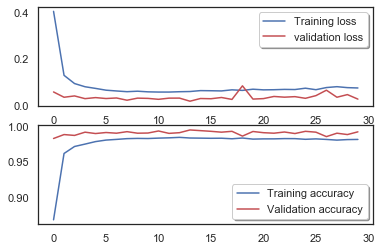

In [30]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history_gen.history['loss'], color='b', label="Training loss")
ax[0].plot(history_gen.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_gen.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_gen.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 4.2 Confusion matrix

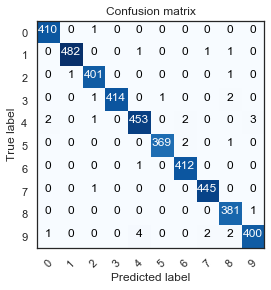

In [32]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_mod.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       411
           1       1.00      0.99      1.00       485
           2       0.99      1.00      0.99       403
           3       1.00      0.99      1.00       418
           4       0.99      0.98      0.98       461
           5       1.00      0.99      0.99       372
           6       0.99      1.00      0.99       413
           7       0.99      1.00      1.00       446
           8       0.98      1.00      0.99       382
           9       0.99      0.98      0.98       409

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



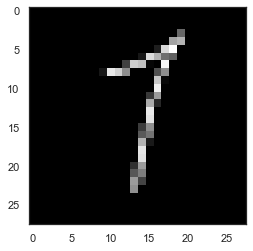

In [34]:
import numpy as np
import cv2



img = cv2.imread('one.png', 0) 
plt.imshow(img, cmap='gray')

In [56]:
def return_label_name (number):
    dictionary = {'1': "one", '2': "two", '3': "three", '4': "four", '5': "five", '6': "six",
            '7': "seven", '8': "eight", '9': "nine", '0': "zero"}
    return " ".join(map(lambda x: dictionary[x], str(number)))


print(return_label_name(0))

zero


In [54]:
img.shape

(1, 28, 28, 1)

In [37]:
img = img / 255

In [39]:
img = img.reshape(-1,28,28,1)


In [40]:
Y_pred = model_mod.predict(img)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [55]:
Y_pred_classes

array([1], dtype=int64)

In [57]:
label_name = return_label_name(Y_pred_classes[0])

In [58]:
print(label_name)

one


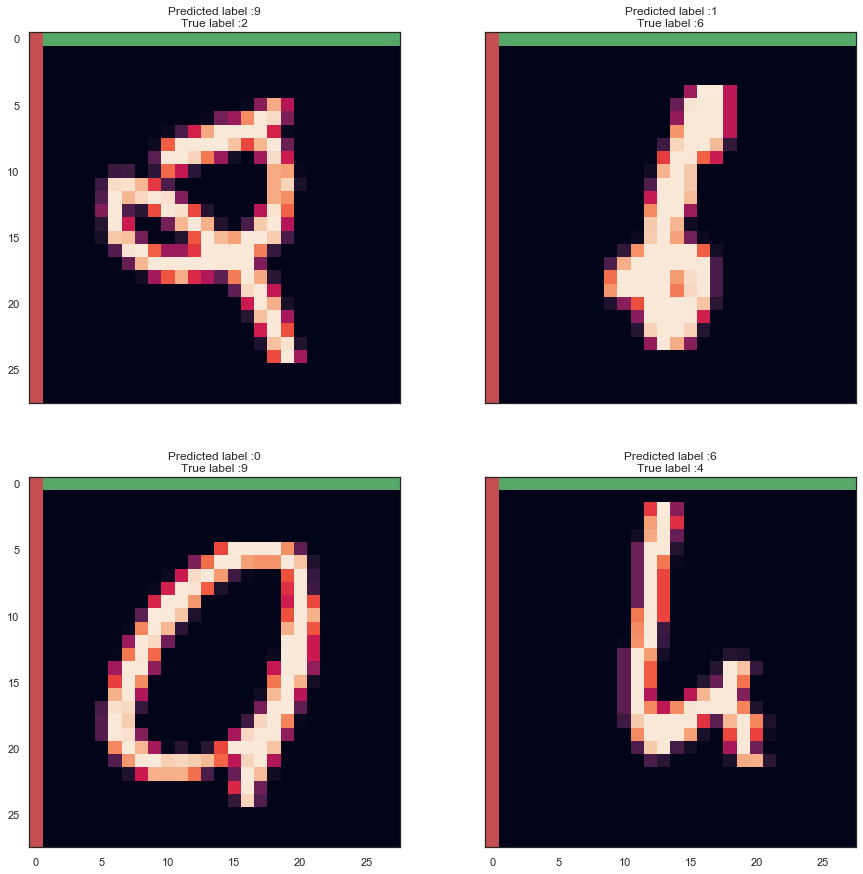

In [84]:


# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]


def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    #plt.LineWidth = 10;
    n = 0
    nrows = 2
    ncols = 2
   
    
    
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,linewidth=7.0,figsize=(15,15))
    #f, axs = plt.subplots(2,2,figsize=(15,15))
    #fig.set_linewidth(4)
   
    

    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            #ax.spines[axis].set_linewidth(0.5)
            #ax.axhline(linewidth=4, color="g")  
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            ax[row,col].axhline(linewidth=14, color="g") 
            ax[row,col].axvline(linewidth=14, color="r")   
            n += 1
            

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [24]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [24]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)